<a href="https://colab.research.google.com/github/johnsonadam187/pytorch_projects/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard imports

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating a basic tensor in torch. Tensors can be scalar, vector, or matrix.

In [2]:
tensor_1 = torch.tensor(4)

Tensors are like arrays in numpy or tensors for tensorflow. They have a host of accompanying methods

In [3]:
tensor_2 = torch.tensor([[1, 2],[3, 4],[5, 6]])

.type() returns the tensor type

In [4]:
tensor_2.type()

'torch.LongTensor'

Tensors have a different type, based on their content

In [5]:
tens = torch.tensor(2.5)
tens.type()

'torch.FloatTensor'

Tensors should be a matrix, unlike a list, the tensors structure is constrained by its shape, meaning that each row/ column/ dimension must be the same length. 

In [6]:
tensor_fail = torch.tensor([[1, 2], [3, 4, 5]])

ValueError: ignored

You can get the shape of a tensor using the standard .shape attribute.

In [7]:
tensor_2.shape

torch.Size([3, 2])

Tensors can use normal mathematical operations

In [8]:
x = torch.tensor(4.0, requires_grad=True)
m = torch.tensor(8.0)
c = torch.tensor(10.0, requires_grad=True)

In [9]:
y = m*x + c
y

tensor(42., grad_fn=<AddBackward0>)

In [10]:
y.type()

'torch.FloatTensor'

Requires_grad, is an argument that you can specify when instantiating a tensor. Tensors must be float to be able to specify requires_grad. When tensors are involved in a calculation (as above) You can use the .backward() function to store each contributing derivative in its .grad attribute. For instance in the previous example (y = mx + c), using the y.backward() function, will store derivatives dy/dm, dy/dx and dy/dc in m.grad, x.grad and c.grad respectively.

In [11]:
y.backward()

In [12]:
print(m.grad, x.grad, c.grad)

None tensor(8.) tensor(1.)


Above the first derivative (m.grad) is listed as None type. This is because we didn't specify requires_grad. Also if we were to list y.grad it would be None type as it is at the end of the calculation, and hence the derivative with respect to another value is unable to be calculated.

In [13]:
y.grad

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


Pytorch interfaces with numpy and pandas. We can convert numpy arrays to tensors using the .from_numpy() function. 


In [14]:
array = np.array([1, 2, 3, 4])


In [15]:
convert = torch.from_numpy(array)
convert

tensor([1, 2, 3, 4])

You can also reverse the process using .numpy().

In [16]:
array = convert.numpy()
array

array([1, 2, 3, 4])

This helps in transferring data between processes. Really, there is not much difference between using a numpy array or pytorch tensor. Pytorch is configured to run on GPU which requires wrapping for CUDA toolkit. This is not done in numpy, so for training and processing that requires lots of memory, pytorch and tensors are much faster.

Creating a simple linear model

Get dataset, simple dataset downloaded from kaggle and imported from google drive

In [17]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
# from google.colab import files
# files.upload()

Saving Real estate.csv to Real estate.csv


{'Real estate.csv': b'No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area\r\n1,2012.917,32,84.87882,10,24.98298,121.54024,37.9\r\n2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2\r\n3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3\r\n4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8\r\n5,2012.833,5,390.5684,5,24.97937,121.54245,43.1\r\n6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1\r\n7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3\r\n8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7\r\n9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8\r\n10,2013.417,17.9,1783.18,3,24.96731,121.51486,22.1\r\n11,2013.083,34.8,405.2134,1,24.97349,121.53372,41.4\r\n12,2013.333,6.3,90.45606,9,24.97433,121.5431,58.1\r\n13,2012.917,13,492.2313,5,24.96515,121.53737,39.3\r\n14,2012.667,20.4,2469.645,4,24.96108,121.51046,23.8\r\n15,2013.500,13.2,1164.838,4,24.99156,121.53406,34.3\r\n16,2013.583

In [27]:
df1 = pd.read_csv("Real estate.csv", index_col = 0)
df1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [28]:
df1.shape

(414, 7)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


Check for categorical columns

In [38]:
for item in df1.columns:
  print(f"{item}: {len(df1[item].value_counts())}")

X1 transaction date: 12
X2 house age: 236
X3 distance to the nearest MRT station: 259
X4 number of convenience stores: 11
X5 latitude: 234
X6 longitude: 232
Y house price of unit area: 270


So it looks like transaction date and number of convenience stores are categorical so we will remove them initially. At a glance it looks as though the target here is house price.

In [39]:
trans_date = df1.pop("X1 transaction date")
conv_stores = df1.pop('X4 number of convenience stores')

Visualise data to look for clear trends

In [40]:
import seaborn as sns

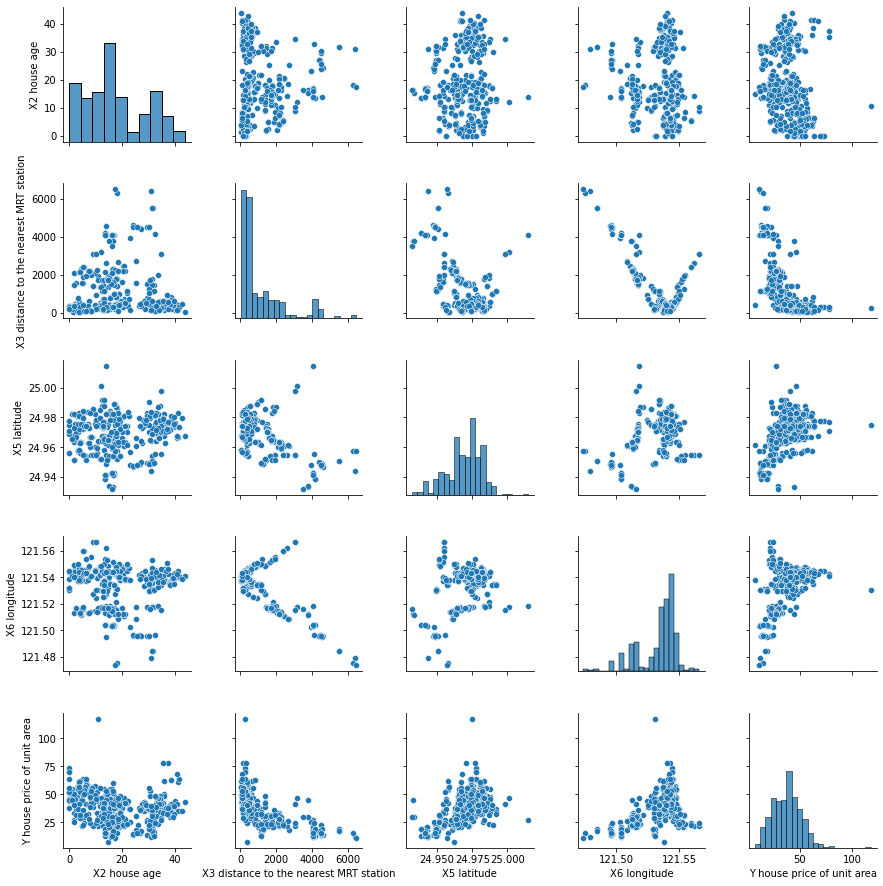

In [41]:
sns.pairplot(df1)
plt.show()

So currently it doesn't look as though there is a single feature that is overly correlated to house price. Next we check the correlation table.

In [42]:
corr = df1.corr()

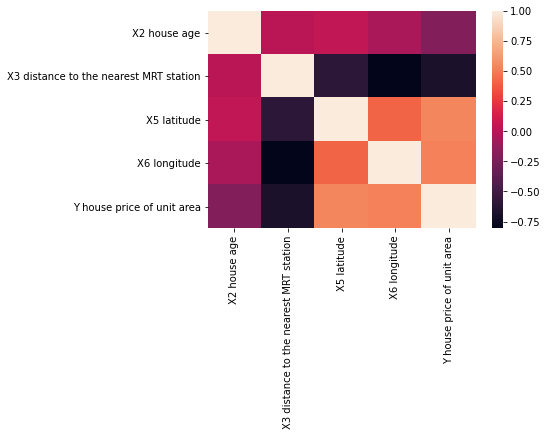

In [43]:
sns.heatmap(corr)
plt.show()

So it looks like distance to MRT station is inversely correlated, while longitude and latitude are weakly ocrrelated to house price.

We are looking to predict a continuous variable, so initially we should be looking at using regression. Exploratory data analysis suggests that no single feature will be suitably predictive, therefore we should opt for a multiple regression. 

We could simply run this in sklearn, but we will use a tools from all libraries to prepare the data, create and train the model in pytorch.

Split the data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
target = df1.pop('Y house price of unit area')

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df1, target, test_size=0.2, shuffle=True)

To convert a pandas dataframe or series to tensor is a bit more labourious. Because it is type Dataframe you must first convert to a numpy array using df.values parameter then you can convert that to a tensor.

In [55]:
train_x = torch.from_numpy(x_train.values)
test_x = torch.from_numpy(x_test.values)
train_y = torch.from_numpy(y_train.values)
test_y = torch.from_numpy(y_test.values)